<center><h1> IFT-6758  Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Social Media Prediction Kaggle Project </h3></center> 
<center><h3> </h3></center> 
<center><h3>Team Name: Social-Dilema</h3></center> 

# Data Science Pipeline

<img src='https://miro.medium.com/max/1400/1*CyK1miQfy1OHmv2wUcjT1w.png'>

# Inspecting Social Media Prediction Project Dataset


[Social Media Prediction ](https://www.kaggle.com/c/ift6758-a20/data)

***Description***:

 The main task for the data challenge is to predict the number of 'likes' for given details about the simulated profiles of users on social media.

You have been provided with various attributes about the visual aspects of the users' social media profiles, the basic details, the profile pictures used in the simulation. With the is information, you need to predict how many 'likes' the users could've likely received.

There is a CSV file of various collected features that has been provided, in addition to images showing the profile pictures of the users (based on the simulation) 

***Evaluation:***

The evaluation metric for this competition is a modified RMSE score. The RMSLE score is given by:
Submission Format

For every user in the test set, submission files should contain two columns: `Id` and `Predicted`. There cannot be any duplicates for the `Id` field and it is case-sensitive. The `Predicted` indicates the predicted `NumProfileLikes` should be non-negative integers. However, the submission is flexible enough to work with real-valued predictions as well.

The file should contain a header and have the following format:

Id,                 Predicted

---



49I3SOKLI2CMNGP4,   19000

***Data Description***

The files provided are described here.

Overall there is a csv file each for the training and test. Additionally, a set of profile images are provided each for train and test.

***File descriptions***

    train.csv - the training set
    profile_images_train.zip - profile images of users specified in the training set (`Profile Image` field)
    test.csv - the test set which has the same structure as the train set except for the field that needs to be predicted (Number of Profile Likes)
    profile_images_test.zip - profile images of users specified in the test set (`Profile Image` field)
    sample_submission.csv - a sample submission file in the correct format with random values for predictions

***Data fields***

    Id - Anonymous unique alphanumeric id for each user
    User Name - The screen name of the user
    Personal URL - The link to the personal webpage of the user, if provided
    User Name - The screen name of the user
    Profile Cover Image Status - Whether the user has used a profile 'cover image' (additional image) on the profile
    Profile Verification Status - The status of the user's profile verification (verified, nt verified, pending, etc.) (validating if the profile is of a genuine user)
    Profile Text Color - The hex code (RRGGBB) of the user profile's text color
    Profile Page Color - The hex code (RRGGBB) of the user profile's page color
    Profile Theme Color - The hex code (RRGGBB) of the user profile's theme color
    Is Profile View Size Customized? - The boolean value if the user has customized the view size of the profile
    UTC Offset The difference of the local time (zone) of the user with respect to the UTC specified in seconds along with a sign +/- to denote the difference
    Location - The text provided by the user to indicate his/her location
    Location Public Visibility - The status of the user's location being shared publicly
    User Language - The abbreviation of the language set by the user to use the profile specified according to (ISO 639-1)[https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes]
    Profile Creation Timestamp - The string indicating the timestamp of the user's profile creation date and time specified as an ISO string
    User Time Zone - The name of the city/time zone of the user
    Num of Followers - The number of followers the user's profile
    Num of People Following - The number of profiles followed by the user
    Num of Status Updates
    Num of Direct Messages
    Profile Category - The category of the user profile as identified by the user - eg. `business`, `government`, etc.
    Avg Daily Profile Visit Duration in seconds - The average values of the number of seconds visitors spend on the user's profile page.
    Avg Daily Profile Clicks - The average number of mouse clicks that visitors of the user's profile make - whether it is for reading threads or pressing other buttons.
    Profile Image - The filename of the PNG image corresponding to the user's profile image used in the simulation. These filenames point to the image file name in the train_profile_images.zip and test_profile_images.zip files.
    Num of Profile Likes - The number of profile 'likes' received by the user from visitors/followers 

***Rules***

    Teams of 3-4
    Try to achieve an RMSLE of less than 1.5, ideally it should be as close as possible to 0
    You are NOT allowed to use additional external data
    You are NOT obliged to use all the features present in the dataset.
    You can only use features derived from the given features.
    2 submissions max per day
    Please checkpoint your code for each submission you make, so that it is accessible during the code submission.
    Clean and preprocess the data as you deem appropriate before trying to fit a model.
    Apply yourself!
    Have fun!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
import os
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [2]:
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)

#### Download the dataset files

#### Load the data into DataFrames

In [3]:
df_train_s = pd.read_csv("train.csv")
df_test_s = pd.read_csv("test.csv")


#### Get DataFrame info

In [ ]:
df_train_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Id                                           7500 non-null   object 
 1   User Name                                    7500 non-null   object 
 2   Personal URL                                 3256 non-null   object 
 3   Profile Cover Image Status                   7410 non-null   object 
 4   Profile Verification Status                  7500 non-null   object 
 5   Profile Text Color                           7434 non-null   object 
 6   Profile Page Color                           7422 non-null   object 
 7   Profile Theme Color                          7428 non-null   object 
 8   Is Profile View Size Customized?             7500 non-null   bool   
 9   UTC Offset                                   7014 non-null   float64
 10  

In [ ]:
df_train_s.head()

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,Location,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes
0,AL85S14OMDPF01I9,Mf9vfld4Vfe,NaN,Set,Verified,db1a2c,eaf0f2,e70409,False,39600.0,NaN,Enabled,en,Thu Nov 27 05:24:59 +0000 2008,Sydney,95763,4289,30809,873,business,14.792,1.5761,AL85S14OMDPF01I9.png,2815
1,HI11QOPD7BLJTO7Q,xl9gaGN0hxM_,NaN,Set,Verified,0099cc,f6ffd1,fff04d,False,NaN,mumbai,Enabled,en,Fri Jan 15 18:00:46 +0000 2010,NaN,1018746,289,8150,290,unknown,8.183,11.2782,HI11QOPD7BLJTO7Q.png,1242
2,JS49LP5P72RI1OQB,d_uiMm,NaN,Set,Not verified,1fc2de,efefef,1fc2de,False,-18000.0,NYC + 70 Countries Worldwide,Enabled,en,Fri Oct 02 20:15:06 +0000 2009,Central Time (US & Canada),13444,1876,4698,227,unknown,31.823,0.5725,JS49LP5P72RI1OQB.png,1559
3,S0GDSC09MACCLBJP,hfylaRr,https://blob/e/g9pex_vS.com,Not set,Verified,050000,616161,00090a,False,-14400.0,"Indianapolis, In",Enabled,en,Thu Feb 19 14:37:22 +0000 2009,Eastern Time (US & Canada),339168,1148,53216,4035,business,23.052,4.0265,S0GDSC09MACCLBJP.png,6342
4,CRSEMK4QER6LDJSA,hRR1sDGlz5,https://blob/v/Szeo.h4/.com,Set,Not verified,58424d,f7f7f7,000000,False,-18000.0,"777 Beach Blvd. Biloxi, MS",Enabled,en,Tue Mar 31 13:27:52 +0000 2009,Central Time (US & Canada),9215,93,3271,130,unknown,8.418,3.9229,CRSEMK4QER6LDJSA.png,1078


How many feature variables to we have?

In [ ]:
# this include the label
df_train_s.shape

(7500, 24)

Which is the target variable here?

***Num of Profile Likes***

#### Inspect for null values

In [ ]:
df_train_s.isnull().sum()

Id                                                0
User Name                                         0
Personal URL                                   4244
Profile Cover Image Status                       90
Profile Verification Status                       0
Profile Text Color                               66
Profile Page Color                               78
Profile Theme Color                              72
Is Profile View Size Customized?                  0
UTC Offset                                      486
Location                                       1461
Location Public Visibility                        0
User Language                                     0
Profile Creation Timestamp                        0
User Time Zone                                  486
Num of Followers                                  0
Num of People Following                           0
Num of Status Updates                             0
Num of Direct Messages                            0
Profile Cate

Some brief data metrics about the data collected. We can see that the number of likes has a high standard deviation, 16448. It appears that there is a high disparity as the mean is 5387.38 but 75% of the posts have less than 4832 likes.

In [ ]:
df_train_s.describe()

,UTC Offset,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Num of Profile Likes
count,7014.000000,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7423.000000,7424.000000,7500.000000
mean,-5898.887938,1.002162e+06,8.071664e+03,3.672141e+04,3.054240e+03,23.006997,3.277067,5386.678800
std,17324.766638,3.660142e+06,4.733062e+04,1.481801e+05,3.817096e+04,8.863637,2.548133,16488.834061
min,-39600.000000,5.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.253000,0.004500,0.000000
25%,-18000.000000,2.540175e+04,1.600000e+02,3.568000e+03,1.520000e+02,16.364500,1.482525,208.750000
50%,-14400.000000,1.839130e+05,5.285000e+02,1.040500e+04,6.340000e+02,23.205000,2.569650,1370.000000
75%,7200.000000,9.077292e+05,1.556750e+03,2.778325e+04,2.297500e+03,29.574500,4.316150,4832.750000
max,46800.000000,1.089908e+08,1.002277e+06,5.836805e+06,3.233474e+06,48.885000,23.062900,550594.000000


#### Drop columns

In [ ]:
toDrop = ['Id','User Name', 'Profile Text Color', 'Profile Page Color', 'Profile Theme Color',
'Location']
df_cleaned = df_train_s.drop(toDrop,axis=1)

In [ ]:
df_cleaned.shape

(7500, 18)

In [ ]:
df_cleaned.head()

,Personal URL,Profile Cover Image Status,Profile Verification Status,Is Profile View Size Customized?,UTC Offset,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes
0,NaN,Set,Verified,False,39600.0,Enabled,en,Thu Nov 27 05:24:59 +0000 2008,Sydney,95763,4289,30809,873,business,14.792,1.5761,AL85S14OMDPF01I9.png,2815
1,NaN,Set,Verified,False,NaN,Enabled,en,Fri Jan 15 18:00:46 +0000 2010,NaN,1018746,289,8150,290,unknown,8.183,11.2782,HI11QOPD7BLJTO7Q.png,1242
2,NaN,Set,Not verified,False,-18000.0,Enabled,en,Fri Oct 02 20:15:06 +0000 2009,Central Time (US & Canada),13444,1876,4698,227,unknown,31.823,0.5725,JS49LP5P72RI1OQB.png,1559
3,https://blob/e/g9pex_vS.com,Not set,Verified,False,-14400.0,Enabled,en,Thu Feb 19 14:37:22 +0000 2009,Eastern Time (US & Canada),339168,1148,53216,4035,business,23.052,4.0265,S0GDSC09MACCLBJP.png,6342
4,https://blob/v/Szeo.h4/.com,Set,Not verified,False,-18000.0,Enabled,en,Tue Mar 31 13:27:52 +0000 2009,Central Time (US & Canada),9215,93,3271,130,unknown,8.418,3.9229,CRSEMK4QER6LDJSA.png,1078


In [ ]:
df_cleaned.isnull().sum()

Personal URL                                   4244
Profile Cover Image Status                       90
Profile Verification Status                       0
Is Profile View Size Customized?                  0
UTC Offset                                      486
Location Public Visibility                        0
User Language                                     0
Profile Creation Timestamp                        0
User Time Zone                                  486
Num of Followers                                  0
Num of People Following                           0
Num of Status Updates                             0
Num of Direct Messages                            0
Profile Category                                  0
Avg Daily Profile Visit Duration in seconds      77
Avg Daily Profile Clicks                         76
Profile Image                                     0
Num of Profile Likes                              0
dtype: int64

histograms of profile likes

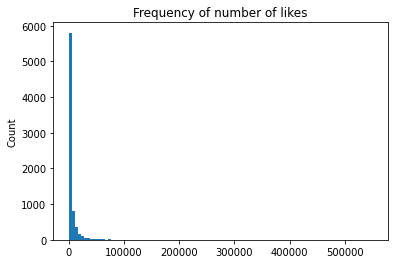

In [ ]:
plt.hist(df_cleaned['Num of Profile Likes'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Frequency of number of likes');

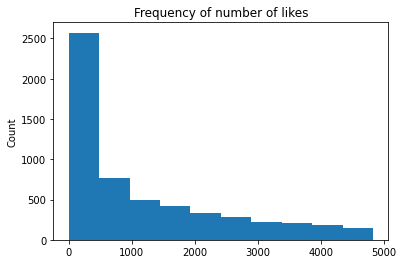

In [ ]:
plt.hist(df_cleaned['Num of Profile Likes'].dropna(),range=(0,df_cleaned['Num of Profile Likes'].dropna().quantile(q=0.75)))
plt.ylabel('Count')
plt.title('Frequency of number of likes');

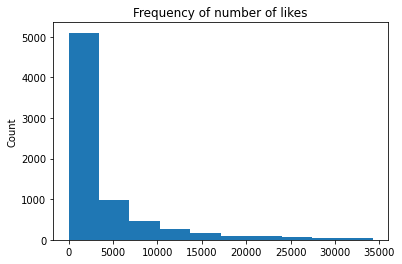

In [ ]:
plt.hist(df_cleaned['Num of Profile Likes'].dropna(),range=(0,df_cleaned['Num of Profile Likes'].dropna().quantile(q=0.975)))
plt.ylabel('Count')
plt.title('Frequency of number of likes');

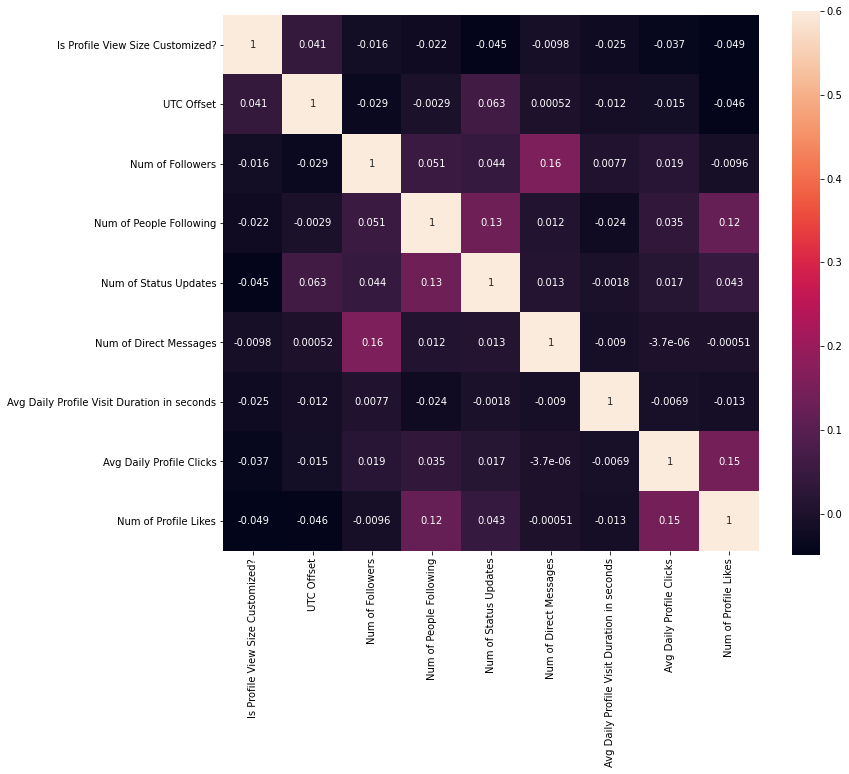

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_cleaned.corr(), vmax=0.6, square=True, annot=True)
#sns.heatmap(df_train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True);

# Feature Engineering


### Feature 1: Profile Verification Status'

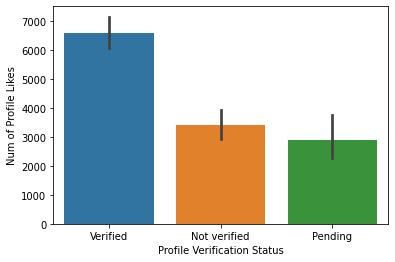

In [ ]:
#Visualize the count of number of profile likes
sns.barplot(x='Profile Verification Status', y='Num of Profile Likes', data=df_cleaned);

In [ ]:
df_cleaned.head()

,Personal URL,Profile Cover Image Status,Profile Verification Status,Is Profile View Size Customized?,UTC Offset,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes
0,NaN,Set,Verified,False,39600.0,Enabled,en,Thu Nov 27 05:24:59 +0000 2008,Sydney,95763,4289,30809,873,business,14.792,1.5761,AL85S14OMDPF01I9.png,2815
1,NaN,Set,Verified,False,NaN,Enabled,en,Fri Jan 15 18:00:46 +0000 2010,NaN,1018746,289,8150,290,unknown,8.183,11.2782,HI11QOPD7BLJTO7Q.png,1242
2,NaN,Set,Not verified,False,-18000.0,Enabled,en,Fri Oct 02 20:15:06 +0000 2009,Central Time (US & Canada),13444,1876,4698,227,unknown,31.823,0.5725,JS49LP5P72RI1OQB.png,1559
3,https://blob/e/g9pex_vS.com,Not set,Verified,False,-14400.0,Enabled,en,Thu Feb 19 14:37:22 +0000 2009,Eastern Time (US & Canada),339168,1148,53216,4035,business,23.052,4.0265,S0GDSC09MACCLBJP.png,6342
4,https://blob/v/Szeo.h4/.com,Set,Not verified,False,-18000.0,Enabled,en,Tue Mar 31 13:27:52 +0000 2009,Central Time (US & Canada),9215,93,3271,130,unknown,8.418,3.9229,CRSEMK4QER6LDJSA.png,1078


In [ ]:
## Converting profile verification status into three separate boolean variables
dummy_PvStatus = pd.get_dummies(df_cleaned['Profile Verification Status'], prefix='Profile Verification Status')
dummy_PvStatus.head()

,Profile Verification Status_Not verified,Profile Verification Status_Pending,Profile Verification Status_Verified
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


### Feature 2: Profile Cover Image Status

There is no interesting variations of profile cover image status

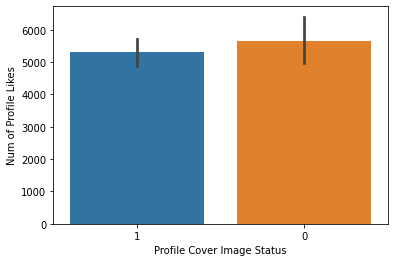

In [ ]:
# Relation of Profile Cover Image Status with Num of Profile Likes
sns.barplot(x='Profile Cover Image Status', y='Num of Profile Likes', data=df_cleaned);

In [ ]:
  df_cleaned['Profile Cover Image Status'].fillna(method='ffill', inplace=True)
  df_cleaned['Profile Cover Image Status'].replace(['Set', 'Not set'], ['1', '0'], inplace=True)

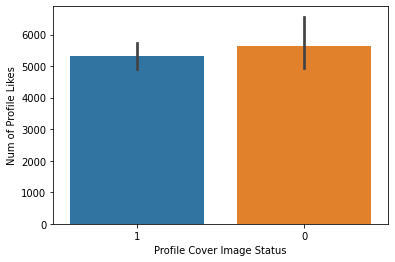

In [ ]:
sns.barplot(x='Profile Cover Image Status', y='Num of Profile Likes', data=df_cleaned);

### Feature 3: Is Profile View Size Customized?

Replaced True with 0 and False with 1

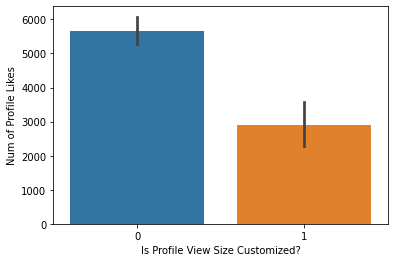

In [ ]:
# Relation of Profile View Size Customized with Num of Profile Likes
sns.barplot(x='Is Profile View Size Customized?', y='Num of Profile Likes', data=df_cleaned);

In [ ]:
df_cleaned['Is Profile View Size Customized?'].replace([False, True], ['0', '1'], inplace=True)

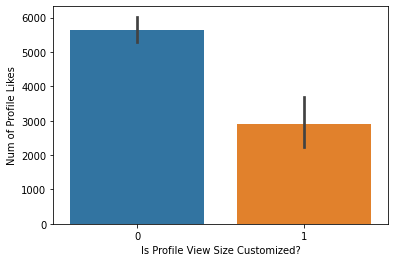

In [ ]:
# Relation of Profile View Size Customized with Num of Profile Likes
sns.barplot(x='Is Profile View Size Customized?', y='Num of Profile Likes', data=df_cleaned);

### Feature 4: Location Public Visibility

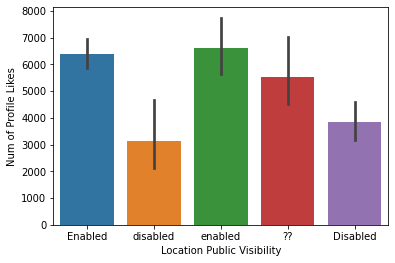

In [ ]:
# Relation of Location Public Visibility with Num of Profile Likes
sns.barplot(x='Location Public Visibility', y='Num of Profile Likes', data=df_cleaned);

Replace enabled with Enabled,disabled with Disabled and ?? with unknown.
Converting Location public visibilty into three separate boolean variables

In [ ]:
df_cleaned['Location Public Visibility'].replace(['enabled', 'disabled','??'], ['Enabled', 'Disabled','unknown'], inplace=True)

In [ ]:
dummy_LPvisib = pd.get_dummies(df_cleaned['Location Public Visibility'], prefix='LP_Visibility') 
dummy_LPvisib.head()

,LP_Visibility_Disabled,LP_Visibility_Enabled,LP_Visibility_unknown
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


### Feature 5: Profile Category

Replace empty categoty with unknown.
Converte categories into separate boolean variables

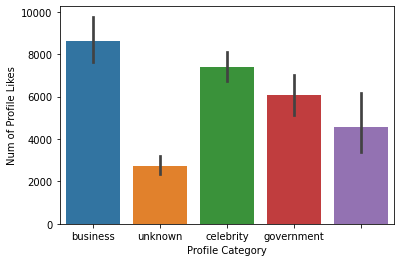

In [ ]:
# Relation of Profile Category with Num of Profile Likes
sns.barplot(x='Profile Category', y='Num of Profile Likes', data=df_cleaned);

In [ ]:
df_cleaned['Profile Category'].value_counts()

unknown       3360
business      1839
celebrity     1401
government     660
               240
Name: Profile Category, dtype: int64

In [ ]:
df_cleaned['Profile Category'].replace([' '],['unknown'], inplace=True)

In [ ]:
df_cleaned['Profile Category'].value_counts()

unknown       3600
business      1839
celebrity     1401
government     660
Name: Profile Category, dtype: int64

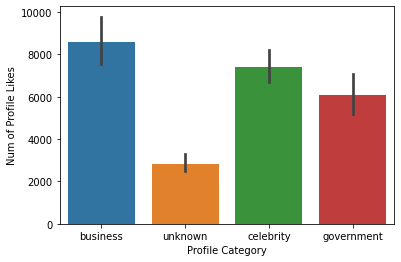

In [ ]:
sns.barplot(x='Profile Category', y='Num of Profile Likes', data=df_cleaned);

In [ ]:
dummy_ProfileCat = pd.get_dummies(df_cleaned['Profile Category'], prefix='ProfileCat') 
dummy_ProfileCat.head()

,ProfileCat_business,ProfileCat_celebrity,ProfileCat_government,ProfileCat_unknown
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1


### Feature 6: Num of Followers

Number of followers data is high skewed distributed. Apply logarithimic transformation

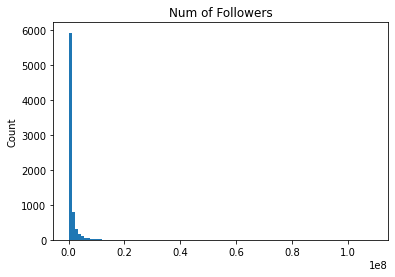

In [ ]:
plt.hist(df_cleaned['Num of Followers'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Num of Followers');

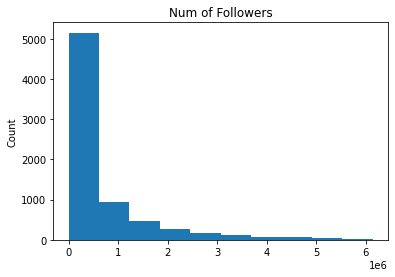

In [ ]:
plt.hist(df_cleaned['Num of Followers'].dropna(),range=(0,df_cleaned['Num of Followers'].dropna().quantile(q=0.975)))
plt.ylabel('Count')
plt.title('Num of Followers');

0       11.469642
1       13.834084
2        9.506363
3       12.734254
4        9.128696
          ...    
7495     8.713911
7496    12.543227
7497     9.982668
7498    11.396459
7499    12.653968
Name: Num of Followers, Length: 7500, dtype: float64

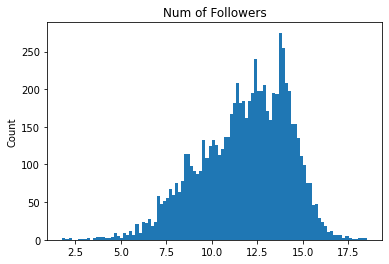

In [ ]:
plt.hist(np.log(1+df_cleaned['Num of Followers'].dropna()), bins=100)
plt.ylabel('Count')
plt.title('Num of Followers');

df_cleaned['Num of Followers']= np.log(1+df_cleaned['Num of Followers'])
df_cleaned['Num of Followers']

### Feature 7: Num of Status Updates

Number of status updates is high skewed distributed. Apply logarithimic transformation

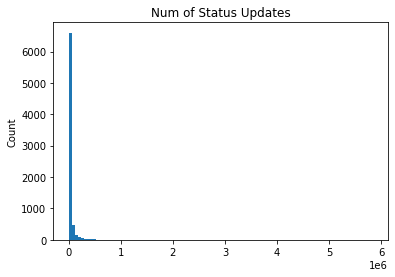

In [ ]:
plt.hist(df_cleaned['Num of Status Updates'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Num of Status Updates');

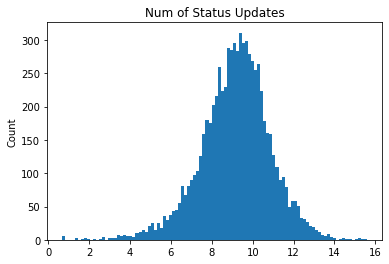

In [ ]:
df_cleaned['Num of Status Updates']= np.log(1+df_cleaned['Num of Status Updates'])
plt.hist(df_cleaned['Num of Status Updates'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Num of Status Updates');

### Feature 8: Num of People Following 

Number of people following is high skewed distributed. Apply logarithimic transformation

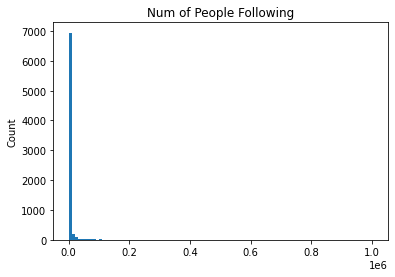

In [ ]:
plt.hist(df_cleaned['Num of People Following'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Num of People Following');

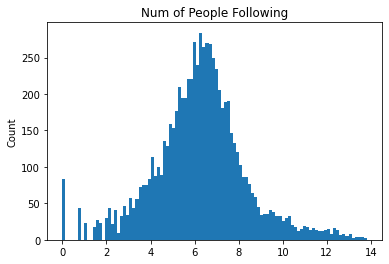

In [ ]:
df_cleaned['Num of People Following']= np.log(1+df_cleaned['Num of People Following'])
plt.hist(df_cleaned['Num of People Following'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Num of People Following');

### Feature 9: Num of Direct Messages

Number of direct messages is high skewed distributed. Apply logarithimic transformation

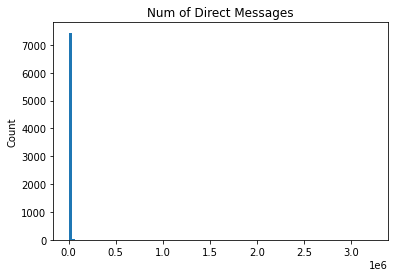

In [ ]:
plt.hist(df_cleaned['Num of Direct Messages'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Num of Direct Messages');

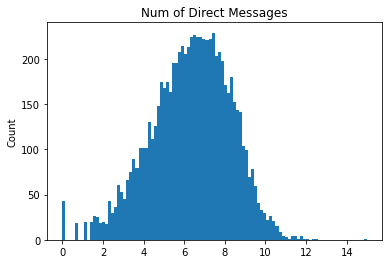

In [ ]:
df_cleaned['Num of Direct Messages']= np.log(1+df_cleaned['Num of Direct Messages'])
plt.hist(df_cleaned['Num of Direct Messages'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Num of Direct Messages');

### Feature 10: Avg Daily Profile Visit Duration in seconds

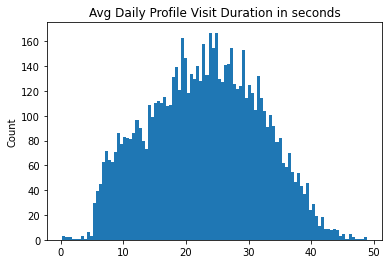

In [ ]:
plt.hist(df_cleaned['Avg Daily Profile Visit Duration in seconds'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Avg Daily Profile Visit Duration in seconds');

### Feature 10: Avg Daily Profile Clicks

Avg Daily Profile Clicks is skewed to left. Apply logarithimic transformation

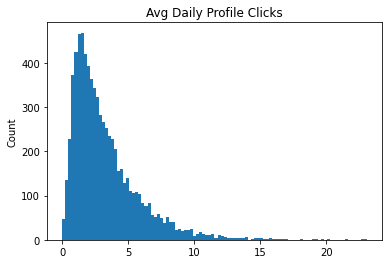

In [ ]:
plt.hist(df_cleaned['Avg Daily Profile Clicks'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Avg Daily Profile Clicks');

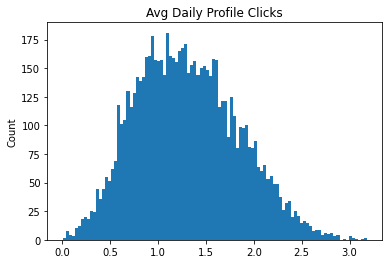

In [ ]:
df_cleaned['Avg Daily Profile Clicks']= np.log(1+df_cleaned['Avg Daily Profile Clicks'])
plt.hist(df_cleaned['Avg Daily Profile Clicks'].dropna(),bins=100)
plt.ylabel('Count')
plt.title('Avg Daily Profile Clicks');

### Feature 11:User Language

As seen 70% of likes are from english speaking. By looking at the percentage of distribution of there are only few langauges infuencing the likes.variable is one hot encoded

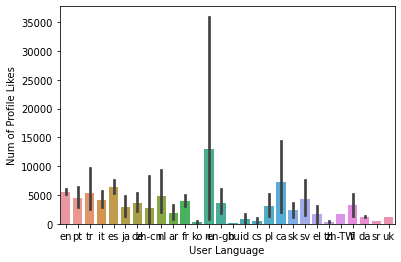

In [ ]:
sns.barplot(x='User Language', y='Num of Profile Likes', data=df_cleaned);

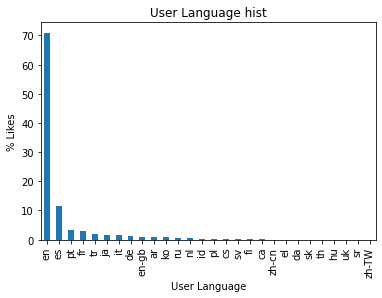

In [ ]:
(df_cleaned['User Language'].value_counts(normalize=True)*100).plot(kind="bar")
plt.title("User Language hist")
plt.ylabel("% Likes")
plt.xlabel("User Language")
plt.show();

In [ ]:
  dummy_User_Language = pd.get_dummies(df_cleaned['User Language'], prefix='User_Lan') 
  df_cleaned = df_cleaned.merge(dummy_User_Language, left_index=True, right_index=True)

In [ ]:
df_cleaned.sample()

,Personal URL,Profile Cover Image Status,Profile Verification Status,Is Profile View Size Customized?,UTC Offset,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes,User_Lan_ar,User_Lan_ca,User_Lan_cs,User_Lan_da,User_Lan_de,User_Lan_el,User_Lan_en,User_Lan_en-gb,User_Lan_es,User_Lan_fi,User_Lan_fr,User_Lan_hu,User_Lan_id,User_Lan_it,User_Lan_ja,User_Lan_ko,User_Lan_nl,User_Lan_pl,User_Lan_pt,User_Lan_ru,User_Lan_sk,User_Lan_sr,User_Lan_sv,User_Lan_th,User_Lan_tr,User_Lan_uk,User_Lan_zh-TW,User_Lan_zh-cn
3866,https://blob/A16qdp_.o.com,1,Verified,0,-14400.0,Enabled,en,Tue Jun 16 20:38:05 +0000 2009,Eastern Time (US & Canada),12.426877,7.061334,10.553075,8.480529,celebrity,24.723,1.823387,M62TTIDTDNJD840P.png,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Feature 12:Profile Creation Timestamp




Extracted only year from the data

In [ ]:
df_cleaned['year'] = pd.DatetimeIndex(df_cleaned['Profile Creation Timestamp']).year

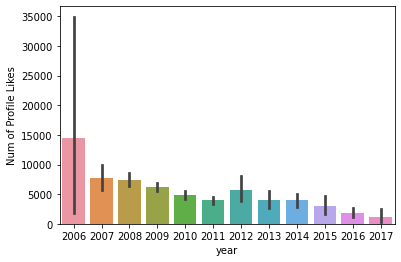

In [ ]:
sns.barplot(x='year', y='Num of Profile Likes', data=df_cleaned);

### Feature 13:UTC offset





Based on UTC offsets the regions are binned in to 5 regions.converted into  separate boolean variables

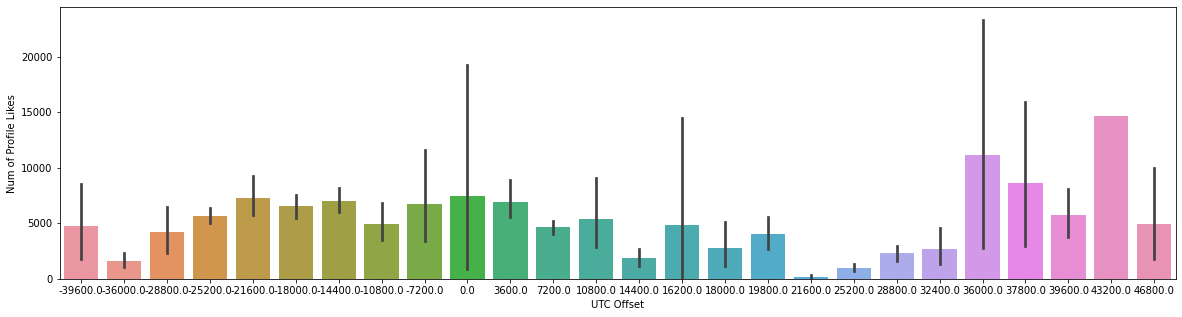

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='UTC Offset', y='Num of Profile Likes', data=df_cleaned);


In [ ]:
df_cleaned['UTC Offset'].fillna(method='ffill', inplace=True)

In [ ]:
df_cleaned['UTC Offset']  = df_cleaned['UTC Offset']/3600
df_cleaned['UTC Offset'] = pd.cut(df_cleaned['UTC Offset'],(-15,-10,-5,0,5,10,15),labels=[0, 1, 2,3,4,5])
df_cleaned['UTC Offset']



0       5
1       5
2       1
3       2
4       1
       ..
7495    1
7496    2
7497    3
7498    2
7499    4
Name: UTC Offset, Length: 7500, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

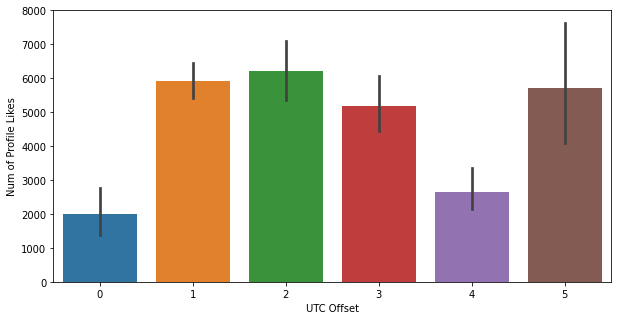

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='UTC Offset', y='Num of Profile Likes', data=df_cleaned);

### Feature 14:URL

Assigned Non null personal URL to 1 and Null to 0

In [ ]:
 df_cleaned.loc[df_cleaned['Personal URL'].notnull(),'Personal URL']=1
 df_cleaned.loc[df_cleaned['Personal URL'].isnull(),'Personal URL']=0

 df_cleaned['Personal URL']


0       0
1       0
2       0
3       1
4       1
       ..
7495    0
7496    0
7497    0
7498    0
7499    1
Name: Personal URL, Length: 7500, dtype: object

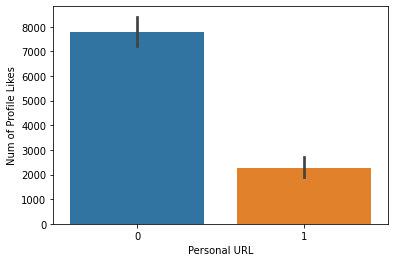

In [ ]:
sns.barplot(x='Personal URL', y='Num of Profile Likes', data=df_cleaned);

### Pre-Processing

In [4]:
# Finalizing all the pre-processing steps we have seen above.
def pre_process(data):

#drop columns
  toDrop = ['User Name','Profile Text Color', 'Profile Page Color', 'Profile Theme Color','User Time Zone','Location']
  df_clean = data.drop(toDrop,axis=1)


#Impute 

  df_clean['Avg Daily Profile Visit Duration in seconds'].fillna(value=df_clean['Avg Daily Profile Visit Duration in seconds'].median(), inplace=True)
  df_clean['Avg Daily Profile Clicks'].fillna(value=df_clean['Avg Daily Profile Clicks'].median(), inplace=True)

 
  #normalise
  df_clean['Num of Followers']= np.log(1+df_clean['Num of Followers'])
  df_clean['Num of Status Updates']= np.log(1+df_clean['Num of Status Updates'])
  df_clean['Num of People Following']= np.log(1+df_clean['Num of People Following'])
  df_clean['Num of Direct Messages']= np.log(1+df_clean['Num of Direct Messages'])
  df_clean['Avg Daily Profile Clicks']= np.log(1+df_clean['Avg Daily Profile Clicks'])

  #Categorical:
  #1.Profile verification status : one hot encoded

  dummy_PvStatus = pd.get_dummies(df_clean['Profile Verification Status'], prefix='PV_Status') 
  df_clean = df_clean.merge(dummy_PvStatus, left_index=True, right_index=True)
 

  #2.Profile Cover Image Status : Imputed missing values using ffill method and converted into 2 separate boolean variables
   
  df_clean['Profile Cover Image Status'].fillna(method='ffill', inplace=True)
  df_clean['Profile Cover Image Status'].replace(['Set', 'Not set'], ['1', '0'], inplace=True)

 # 3. Is Profile View Size Customized? : Replaced True with 0 and False with 1

  df_clean['Is Profile View Size Customized?'].replace([False, True], ['0', '1'], inplace=True)

  #4. Replace enabled with Enabled,disabled with Disabled and ?? with unknown. Converting Location public visibilty into three separate boolean variables

  df_clean['Location Public Visibility'].replace(['enabled', 'disabled','??'], ['Enabled', 'Disabled','unknown'], inplace=True)
  dummy_LPvisib = pd.get_dummies(df_clean['Location Public Visibility'], prefix='LP_Visibility') 
  df_clean = df_clean.merge(dummy_LPvisib, left_index=True, right_index=True)

  #5.Replace empty categoty with unknown. Converte categories into separate boolean variables

  df_clean['Profile Category'].replace([' '],['unknown'], inplace=True)
  dummy_ProfileCat = pd.get_dummies(df_clean['Profile Category'], prefix='ProfileCat') 
  df_clean = df_clean.merge(dummy_ProfileCat, left_index=True, right_index=True)

  # 6.variable is one hot encoded. By looking at the percentage of distribution of langues only top 4 are considered.
  dummy_User_Language = pd.get_dummies(df_clean['User Language'], prefix='User_Lan') 
  df_clean = df_clean.merge(dummy_User_Language, left_index=True, right_index=True)

# 7.Extracted only year 
  df_clean['Profile Creation year'] = pd.DatetimeIndex(df_clean['Profile Creation Timestamp']).year
  #ft = df_clean.groupby(['year']).size()/len(df_clean['year'])
  #df_clean.loc[:,'year'] = df_clean['year'].map(ft)

# 8.UTC OFFSET
  #Imputed missing values with FFILL method. Converted seconds in to minutes and bucketed to 5 regions
  df_clean['UTC Offset'].fillna(method='ffill', inplace=True)
  df_clean['UTC Offset']  = df_clean['UTC Offset']/3600
  df_clean['UTC Offset'] = pd.cut(df_clean['UTC Offset'],(-15,-10,-5,0,5,10,15),labels=[0, 1, 2,3,4,5])

  9.#Personal URL
  #Replaced NON null URL with 1 and Null to 1
  df_clean.loc[df_clean['Personal URL'].notnull(),'Personal URL']=1
  df_clean.loc[df_clean['Personal URL'].isnull(),'Personal URL']=0



  #scalin the variables,

  scaled_features = df_clean.copy()
  col_names = ['Num of Followers','Num of Status Updates','Num of People Following','Num of Direct Messages',
'Avg Daily Profile Visit Duration in seconds','Avg Daily Profile Clicks',
'Profile Cover Image Status',
'PV_Status_Verified','PV_Status_Not verified','PV_Status_Pending',
'Is Profile View Size Customized?',
'LP_Visibility_Enabled','LP_Visibility_Disabled','LP_Visibility_unknown',
'ProfileCat_business','ProfileCat_celebrity','ProfileCat_government','ProfileCat_unknown',
'User_Lan_en','User_Lan_es','User_Lan_pt','User_Lan_fr',
'Profile Creation year',
'UTC Offset',
'Personal URL',
]
    
  features = scaled_features[col_names]
  scaler = RobustScaler().fit(features.values)
  features = scaler.transform(features.values)

  df_clean[col_names] = features
  return df_clean


#Correlation check

In [ ]:
cols=['Num of Followers','Num of Status Updates','Num of People Following','Num of Direct Messages',
'Avg Daily Profile Visit Duration in seconds','Avg Daily Profile Clicks',
'Profile Creation year',
'Num of Profile Likes'
]

## HeatMAP for Numerical features

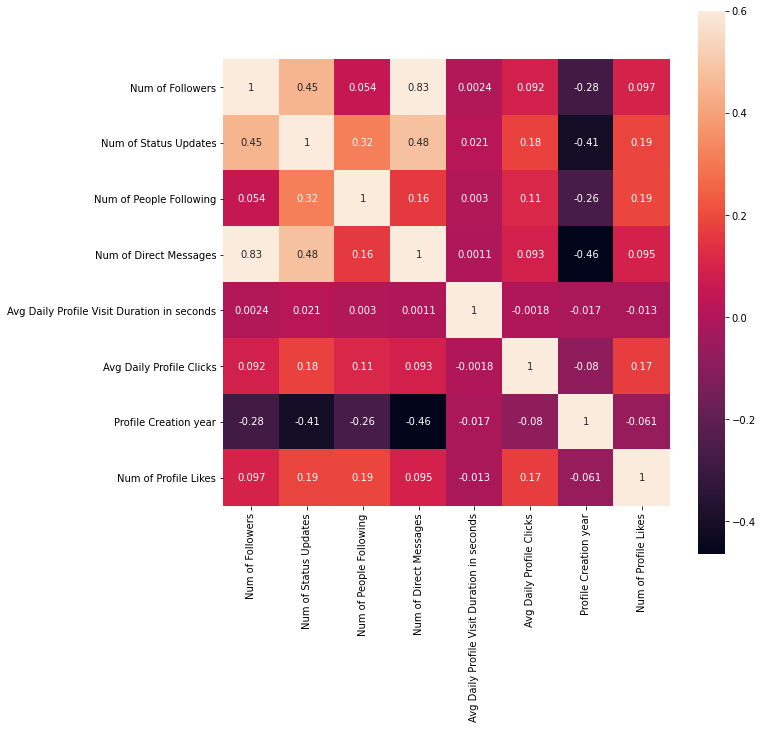

In [ ]:
df_p = pre_process(pd.read_csv("train.csv"))
plt.figure(figsize=(10,10))
sns.heatmap(df_p[cols].corr(), vmax=0.6,square=True, annot=True)


##Correlation with Target Variable (Num of Profile Likes )

Dropped columns whose correlation is <0.01 with Likes ('Profile Cover Image Status' and 'LP_Visibility_unknown') Also there is no intresting data variation in Profile Cover Image Status so dropped

In [ ]:
  cols= ['Num of Followers','Num of Status Updates','Num of People Following','Num of Direct Messages',
'Avg Daily Profile Visit Duration in seconds','Avg Daily Profile Clicks',
'Profile Cover Image Status',
'PV_Status_Verified','PV_Status_Not verified','PV_Status_Pending',
'Is Profile View Size Customized?',
'LP_Visibility_Enabled','LP_Visibility_Disabled','LP_Visibility_unknown',
'ProfileCat_business','ProfileCat_celebrity','ProfileCat_government','ProfileCat_unknown',
'User_Lan_en','User_Lan_es','User_Lan_pt','User_Lan_fr',
'Profile Creation year',
'UTC Offset',
'Personal URL',
'Num of Profile Likes'
]

df_p[cols].corr()['Num of Profile Likes'][:]

Num of Followers                               0.097088
Num of Status Updates                          0.186932
Num of People Following                        0.192549
Num of Direct Messages                         0.094948
Avg Daily Profile Visit Duration in seconds   -0.012948
Avg Daily Profile Clicks                       0.168426
Profile Cover Image Status                    -0.008711
PV_Status_Verified                             0.095926
PV_Status_Not verified                        -0.076285
PV_Status_Pending                             -0.043599
Is Profile View Size Customized?              -0.049112
LP_Visibility_Enabled                          0.075806
LP_Visibility_Disabled                        -0.078384
LP_Visibility_unknown                          0.001990
ProfileCat_business                            0.111259
ProfileCat_celebrity                           0.058708
ProfileCat_government                          0.013108
ProfileCat_unknown                            -0

##Correlation of Categorical variables

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import math
import seaborn as sns
import pandas as pd
%matplotlib inline

#Create a column for work hour categories.
cut_points = [0,208,1370,4832,550594]
label_names = ["0-208","209-1370","1371-4832",' 4833 +']
df_p['Num of Profile-Likes-Category'] = pd.cut(df_p['Num of Profile Likes'], cut_points, labels=label_names)

New_Data = df_p[['Location Public Visibility','Profile Category','Is Profile View Size Customized?','Personal URL','Profile Verification Status','UTC Offset','User Language','Num of Profile Likes', 'Num of Profile-Likes-Category']]
New_Data.head()


,Location Public Visibility,Profile Category,Is Profile View Size Customized?,Personal URL,Profile Verification Status,UTC Offset,User Language,Num of Profile Likes,Num of Profile-Likes-Category
0,Enabled,business,0.0,0.0,Verified,1.5,en,2815,1371-4832
1,Enabled,unknown,0.0,0.0,Verified,1.5,en,1242,209-1370
2,Enabled,unknown,0.0,0.0,Not verified,-0.5,en,1559,1371-4832
3,Enabled,business,0.0,1.0,Verified,0.0,en,6342,4833 +
4,Enabled,unknown,0.0,1.0,Not verified,-0.5,en,1078,209-1370


In [ ]:
New_Data['Num of Profile-Likes-Category'].value_counts() 
contingency_table = pd.crosstab(
    New_Data['Is Profile View Size Customized?'],
    New_Data['Num of Profile-Likes-Category'],
    margins = True
)
contingency_table


Num of Profile-Likes-Category,0-208,209-1370,1371-4832,4833 +,All
Is Profile View Size Customized?,,,,,
0.0,1318,1701,1747,1783,6549
1.0,267,175,127,92,661
All,1585,1876,1874,1875,7210


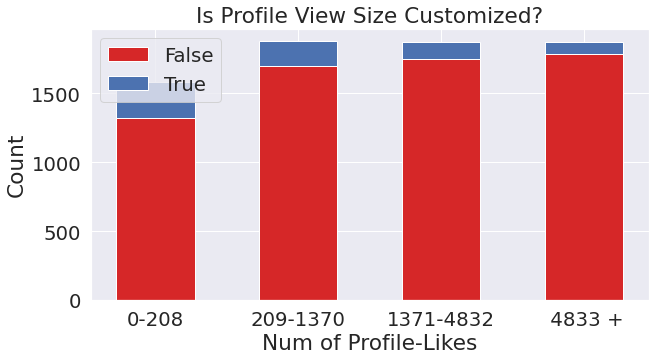

(166.00110379452315, 9.287671368909458e-36, 3)

In [ ]:
New_Data['Num of Profile-Likes-Category'].value_counts() 
contingency_table = pd.crosstab(
    New_Data['Is Profile View Size Customized?'],
    New_Data['Num of Profile-Likes-Category'],
    margins = True
)
contingency_table

#Assigns the frequency values
Firstcount = contingency_table.iloc[0][0:4].values
Secondcount = contingency_table.iloc[1][0:4].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0-208","209-1370","1371-4832"," 4833 +"]
p1 = plt.bar(categories, Firstcount, 0.55, color='#d62728')
p2 = plt.bar(categories, Secondcount, 0.55, bottom=Firstcount)
plt.legend((p1[0], p2[0]), ('False', 'True'))
plt.title('Is Profile View Size Customized?')
plt.xlabel('Num of Profile-Likes')
plt.ylabel('Count')
plt.show()

f_obs = np.append(contingency_table.iloc[0][0:4].values, contingency_table.iloc[1][0:4].values)
f_obs

f_obs = np.array([contingency_table.iloc[0][0:4].values,
                  contingency_table.iloc[1][0:4].values])
f_obs

from scipy import stats
stats.chi2_contingency(f_obs)

from scipy import stats
stats.chi2_contingency(f_obs)[0:3]



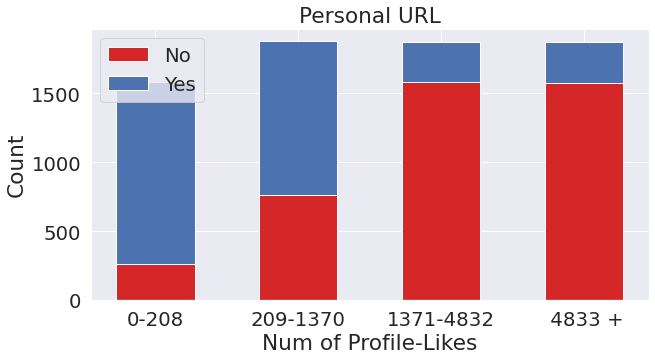

(2385.367755264395, 0.0, 3)

In [ ]:
New_Data['Num of Profile-Likes-Category'].value_counts() 
contingency_table = pd.crosstab(
    New_Data['Personal URL'],
    New_Data['Num of Profile-Likes-Category'],
    margins = True
)
contingency_table

#Assigns the frequency values
Firstcount = contingency_table.iloc[0][0:4].values
Secondcount = contingency_table.iloc[1][0:4].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0-208","209-1370","1371-4832"," 4833 +"]
p1 = plt.bar(categories, Firstcount, 0.55, color='#d62728')
p2 = plt.bar(categories, Secondcount, 0.55, bottom=Firstcount)
plt.legend(( p1[0],p2[0]), ('No', 'Yes'))
plt.title('Personal URL')
plt.xlabel('Num of Profile-Likes')
plt.ylabel('Count')
plt.show()

f_obs = np.append(contingency_table.iloc[0][0:4].values, contingency_table.iloc[1][0:4].values)
f_obs

f_obs = np.array([contingency_table.iloc[0][0:4].values,
                  contingency_table.iloc[1][0:4].values])
f_obs

from scipy import stats
stats.chi2_contingency(f_obs)

from scipy import stats
stats.chi2_contingency(f_obs)[0:3]



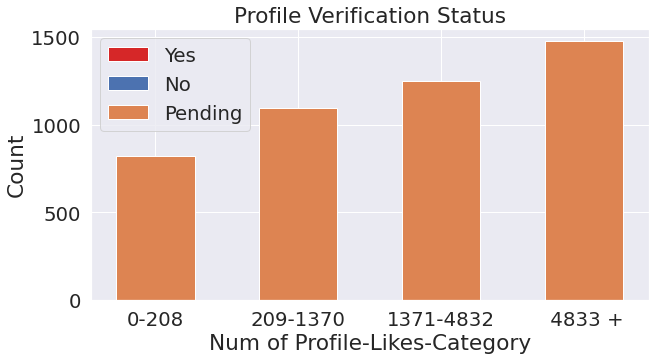

(307.15209135291445, 2.3990725213230455e-63, 6)

In [ ]:
New_Data['Num of Profile-Likes-Category'].value_counts() 
contingency_table = pd.crosstab(
    New_Data['Profile Verification Status'],
    New_Data['Num of Profile-Likes-Category'],
    margins = True
)
contingency_table


#Assigns the frequency values
Firstcount = contingency_table.iloc[0][0:4].values
Secondcount = contingency_table.iloc[1][0:4].values
Thirdcount = contingency_table.iloc[2][0:4].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0-208","209-1370","1371-4832"," 4833 +"]
p1 = plt.bar(categories, Firstcount, 0.55, color='#d62728')
p2 = plt.bar(categories, Secondcount, 0.55, bottom=Firstcount)
p3 = plt.bar(categories, Thirdcount, 0.55)
plt.legend((p1[0],p2[0], p3[0]), ('Yes', 'No','Pending'))
plt.title('Profile Verification Status')
plt.xlabel('Num of Profile-Likes-Category')
plt.ylabel('Count')
plt.show()

f_obs = np.append(contingency_table.iloc[0][0:4].values, contingency_table.iloc[1][0:4].values)
f_obs

f_obs = np.array([contingency_table.iloc[0][0:4].values,
                  contingency_table.iloc[1][0:4].values,contingency_table.iloc[2][0:4].values])
f_obs

from scipy import stats
stats.chi2_contingency(f_obs)

from scipy import stats
stats.chi2_contingency(f_obs)[0:3]



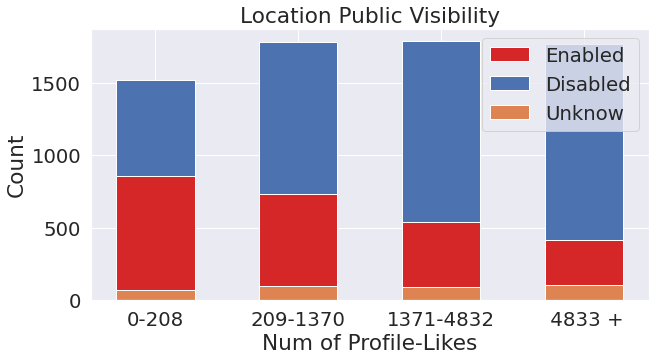

(442.98456375945165, 1.587569962184277e-92, 6)

In [ ]:
New_Data['Num of Profile-Likes-Category'].value_counts() 
contingency_table = pd.crosstab(
    New_Data['Location Public Visibility'],
    New_Data['Num of Profile-Likes-Category'],
    margins = True
)
contingency_table



#Assigns the frequency values 
Firstcount = contingency_table.iloc[0][0:4].values
Secondcount = contingency_table.iloc[1][0:4].values
Thirdcount = contingency_table.iloc[2][0:4].values


#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0-208","209-1370","1371-4832"," 4833 +"]
p1 = plt.bar(categories, Firstcount, 0.55, color='#d62728')
p2 = plt.bar(categories, Secondcount, 0.55, bottom=Firstcount)
p3 = plt.bar(categories, Thirdcount, 0.55)


plt.legend((p1[0],p2[0], p3[0]), ('Enabled', 'Disabled', 'Unknow'))
plt.title('Location Public Visibility')
plt.xlabel('Num of Profile-Likes')
plt.ylabel('Count')
plt.show()

f_obs = np.append(contingency_table.iloc[0][0:4].values, contingency_table.iloc[1][0:4].values)
f_obs

f_obs = np.array([contingency_table.iloc[0][0:4].values,
                  contingency_table.iloc[1][0:4].values,contingency_table.iloc[2][0:4].values])
f_obs

from scipy import stats
stats.chi2_contingency(f_obs)

from scipy import stats
stats.chi2_contingency(f_obs)[0:3]


# Fit Model

Final columns considered for model fitting

In [5]:
df_train = pre_process(pd.read_csv("train.csv"))
df_test = pre_process(pd.read_csv("test.csv"))

df_train['Num of Profile Likes']= np.log(1+df_train['Num of Profile Likes'])


cols_x =['Num of Followers','Num of Status Updates','Num of People Following','Num of Direct Messages',
'Avg Daily Profile Visit Duration in seconds','Avg Daily Profile Clicks',
'PV_Status_Verified','PV_Status_Pending','PV_Status_Not verified', 
'Is Profile View Size Customized?',
'LP_Visibility_Enabled','LP_Visibility_Disabled',
'ProfileCat_business','ProfileCat_celebrity','ProfileCat_government','ProfileCat_unknown',
'User_Lan_en','User_Lan_es','User_Lan_pt','User_Lan_fr',
'Profile Creation year',
'UTC Offset',
'Personal URL',
]

cols_y = 'Num of Profile Likes'

#### Train_Test_Split

In [9]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import xgboost
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from sklearn.metrics import classification_report


In [10]:
from sklearn.model_selection import train_test_split

# split dataset to train and test
X_train, X_val, y_train, y_val = train_test_split(df_train[cols_x], df_train[cols_y], 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=8 #  To guarantee that the split will always be the same
                                                    )  



### Intitialisation

In [ ]:
result = pd.DataFrame(columns = ("Regressors","Training","Testing"))
Regressor, train_scores, test_scores = [],[],[]

#CV Strategy:

In [11]:
k_fold = KFold(n_splits=5, shuffle=True,random_state=1)

In [12]:
from sklearn.metrics.scorer import make_scorer

def adjusted_rmsle(y_true, y_pred,**kwargs):
    y_pred=np.exp(y_pred)-1
    y_pred = [0 if x<0 else x for x in y_pred]
    y_check=np.exp(y_true)-1
    MSLE=mean_squared_log_error(y_check, y_pred,)
    RMSLE=np.sqrt(MSLE)
    return RMSLE

my_scorer = make_scorer(adjusted_rmsle)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Support Vector Regression

##### Tune parameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

sregressor=SVR()

# How large is this parameter space?
tuned_parameters = [
  {'kernel': ['rbf'],
  'gamma': np.logspace(-1, -2, num=50),
  'C': np.logspace(0, 3, num=50)},
  
  {'kernel': ['linear'],
   'C': np.logspace(0, 3, num=50)},
]

grid_search = RandomizedSearchCV(
    sregressor, tuned_parameters, n_iter=10, cv=k_fold,scoring=my_scorer,
)
grid_search.fit(df_train[cols_x], df_train[cols_y]);
print('Finished!')

Finished!


In [ ]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)

Best parameters set found on development set:

{'kernel': 'rbf', 'gamma': 0.09102981779915217, 'C': 19.306977288832496}


In [ ]:
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:

1.827 (+/-0.038) for {'kernel': 'rbf', 'gamma': 0.09102981779915217, 'C': 19.306977288832496}
1.757 (+/-0.041) for {'kernel': 'rbf', 'gamma': 0.03556480306223128, 'C': 1.7575106248547918}
1.800 (+/-0.045) for {'kernel': 'rbf', 'gamma': 0.06250551925273973, 'C': 25.59547922699536}
1.754 (+/-0.043) for {'kernel': 'rbf', 'gamma': 0.0655128556859551, 'C': 1.3257113655901092}
1.764 (+/-0.054) for {'kernel': 'rbf', 'gamma': 0.019306977288832506, 'C': 91.02981779915217}
1.811 (+/-0.046) for {'kernel': 'rbf', 'gamma': 0.03906939937054617, 'C': 91.02981779915217}
1.753 (+/-0.051) for {'kernel': 'rbf', 'gamma': 0.05689866029018296, 'C': 4.714866363457394}
1.760 (+/-0.039) for {'kernel': 'rbf', 'gamma': 0.014563484775012445, 'C': 4.714866363457394}
1.756 (+/-0.049) for {'kernel': 'rbf', 'gamma': 0.022229964825261957, 'C': 9.54095476349994}
1.756 (+/-0.053) for {'kernel': 'rbf', 'gamma': 0.019306977288832506, 'C': 29.4705170255181}


In [ ]:
parameters = {'C':[0.1,0.2,0.5 ,1, 2,3,4,5,6],'gamma': [1,0.01 , 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002,
       0.001,1e-1,1e-2, 1e-3, 1e-6,1e-7,1e-5,'scale']}

sregressor=SVR()
svR = SVR(kernel = 'rbf')

clf = GridSearchCV(svR, parameters,cv=k_fold,)
clf.fit(df_train[cols_x], df_train[cols_y])

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_gamma',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'C': 2, 'gamma': 0.1}


In [ ]:
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:

0.099 (+/-0.017) for {'C': 0.1, 'gamma': 1}
0.426 (+/-0.028) for {'C': 0.1, 'gamma': 0.01}
0.419 (+/-0.028) for {'C': 0.1, 'gamma': 0.009}
0.410 (+/-0.028) for {'C': 0.1, 'gamma': 0.008}
0.400 (+/-0.029) for {'C': 0.1, 'gamma': 0.007}
0.387 (+/-0.028) for {'C': 0.1, 'gamma': 0.006}
0.370 (+/-0.029) for {'C': 0.1, 'gamma': 0.005}
0.349 (+/-0.028) for {'C': 0.1, 'gamma': 0.004}
0.318 (+/-0.027) for {'C': 0.1, 'gamma': 0.003}
0.274 (+/-0.026) for {'C': 0.1, 'gamma': 0.002}
0.185 (+/-0.025) for {'C': 0.1, 'gamma': 0.001}
0.485 (+/-0.021) for {'C': 0.1, 'gamma': 0.1}
0.426 (+/-0.028) for {'C': 0.1, 'gamma': 0.01}
0.185 (+/-0.025) for {'C': 0.1, 'gamma': 0.001}
-0.045 (+/-0.026) for {'C': 0.1, 'gamma': 1e-06}
-0.045 (+/-0.026) for {'C': 0.1, 'gamma': 1e-07}
-0.042 (+/-0.026) for {'C': 0.1, 'gamma': 1e-05}
0.478 (+/-0.018) for {'C': 0.1, 'gamma': 'scale'}
0.153 (+/-0.013) for {'C': 0.2, 'gamma': 1}
0.464 (+/-0.029) for {'C': 0.2, 'gamma': 0.01}
0.459 (+/-0.029

##### Final SVR Model

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score

In [ ]:
regressor = SVR(kernel = 'rbf', C=2, gamma= 0.1)
regressor.fit(X_train, y_train)
y_pred=np.exp(regressor.predict(X_val))-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1
print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))

Regressor.append("SVR")

train_scores.append(regressor.score(X_train, y_train))
test_scores.append(regressor.score(X_val, y_val))

RMSLE 1.727131636724934


#####Crossvalidation of error - SVR

In [ ]:
scores = cross_val_score(regressor, df_train[cols_x], df_train[cols_y], cv=k_fold,scoring=my_scorer)
print("Reg: RSMLE: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Reg: RSMLE: 1.7533 (+/- 0.0219)


#### KNN Regressor

##### Tune parameters

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

tuned_parameters = [
  {'n_neighbors': [1,2,4,6,8,10,12,14,16,18,20]},
    {'weights': ['uniform', 'distance']},
]

knn=KNeighborsRegressor()

grid_search = GridSearchCV(
    knn,tuned_parameters,cv=k_fold,
)
grid_search.fit(df_train[cols_x], df_train[cols_y]);
print('Finished!')


Finished!


In [ ]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)

Best parameters set found on development set:

{'n_neighbors': 20}


In [ ]:
print("Grid scores on development set:")
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:

0.090 (+/-0.080) for {'n_neighbors': 1}
0.294 (+/-0.060) for {'n_neighbors': 2}
0.397 (+/-0.049) for {'n_neighbors': 4}
0.438 (+/-0.059) for {'n_neighbors': 6}
0.450 (+/-0.048) for {'n_neighbors': 8}
0.455 (+/-0.044) for {'n_neighbors': 10}
0.464 (+/-0.044) for {'n_neighbors': 12}
0.467 (+/-0.044) for {'n_neighbors': 14}
0.465 (+/-0.046) for {'n_neighbors': 16}
0.466 (+/-0.047) for {'n_neighbors': 18}
0.467 (+/-0.043) for {'n_neighbors': 20}
0.422 (+/-0.053) for {'weights': 'uniform'}
0.424 (+/-0.051) for {'weights': 'distance'}


##### Final KNN model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 20,weights='distance')
knn.fit(X_train, y_train)
y_pred=np.exp(knn.predict(X_val))-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1

print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))

Regressor.append("KNN")
train_scores.append(knn.score(X_train, y_train))
test_scores.append(knn.score(X_val, y_val))

RMSLE 1.8666115295083847


#####Crossvalidation of error -KNN

In [ ]:
scores = cross_val_score(knn, df_train[cols_x], df_train[cols_y], cv=k_fold,scoring=my_scorer)
print("Reg: RSMLE: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Reg: RSMLE: 1.8640 (+/- 0.0156)


#### Linear Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
lregressor = LinearRegression()

lregressor.fit(X_train, y_train)
y_pred=np.exp(lregressor.predict(X_val))-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1

print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))

Regressor.append("Linear Regression")
train_scores.append(lregressor.score(X_train, y_train))
test_scores.append(lregressor.score(X_val, y_val))


RMSLE 1.8500030351876302


#####Crossvalidation of error - Linear Regression

In [ ]:
scores = cross_val_score(lregressor , df_train[cols_x], df_train[cols_y], cv=k_fold,scoring=my_scorer)
print("Reg: RSMLE: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))


Reg: RSMLE: 1.8402 (+/- 0.0276)


#### ADA boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adareg=AdaBoostRegressor(random_state=0, n_estimators=100)
scores = cross_val_score(adareg , df_train[cols_x], df_train[cols_y], cv=k_fold,scoring=my_scorer)
print("Reg: RSMLE: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Reg: RSMLE: 2.1153 (+/- 0.0869)


####XGBoost

In [6]:
import xgboost

#####Tune parameters

In [7]:
parameters_for_testing = {
    'colsample_bytree':[0.4],#[0.4,0.6,0.8],
    'gamma':[0.3,0.5,1],#[0,0.03,0.1,0.3],
    'min_child_weight':[1.5],#[1.5,6,10],
    'learning_rate':[0.1,0.01,0.001],#[0.1,0.07],
    'max_depth':[3],#[3,5],
    'n_estimators':[10000],
    'reg_alpha':[0.6, 0.75, 0.8],#[1e-5, 1e-2,  0.75],
    'reg_lambda':[0.3, 0.45,0.6],#[1e-5, 1e-2, 0.45],
    'subsample':[0.6]#[0.6,0.95]  
}



In [ ]:
xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0.3,#0                 
                 learning_rate=0.001,#0.001,#0.01,#0.07
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42,
                 early_stopping_rounds=5)
gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, cv=k_fold, verbose=10)
gsearch1.fit(X_train,y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  6.0min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  8.1min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 10.2min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 14.2min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 18.3min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 22.2min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 26.2min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 30.3min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed: 34.3min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 40.3min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed: 46.4min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed: 52.3min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed: 58.6min
[Parallel(

[19:18:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.4,
                                    early_stopping_rounds=5, gamma=0.3,
                                    importance_type='gain', learning_rate=0.001,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1.5, missing=None,
                                    n_estimators=1000...
                                    subsample=0.6, verbosity=1),
             iid=False, n_jobs=6,
             param_grid={'colsample_bytree': [0.4], 'gamma': [0.3, 0.5, 1],
                         'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3],
                         'min_child_weight': [1.5], 'n_estimators': [10000],
                   

In [ ]:
#print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)
#best params
#{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'subsample': 0.6}
#best score
#0.5442454931236094

#after running on 8/dec/2020
#best params
#{'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 0.8, 'reg_lambda': 0.6, 'subsample': 0.6}
#best score
#0.539487363773607

best params
{'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.001, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 0.8, 'reg_lambda': 0.6, 'subsample': 0.6}
best score
0.539487363773607


#####Final XGB model

In [13]:
#final model
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=1,#0.3,               
                 learning_rate=0.001,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.8,#0.75,-- modify
                 reg_lambda=0.6,#0.45,--modify
                 subsample=0.6,
                 seed=42,
                 early_stopping_rounds=5)
best_xgb_model.fit(X_train,y_train)

[16:25:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, early_stopping_rounds=5,
             gamma=1, importance_type='gain', learning_rate=0.001,
             max_delta_step=0, max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.8, reg_lambda=0.6, scale_pos_weight=1,
             seed=42, silent=None, subsample=0.6, verbosity=1)

In [ ]:
y_pred=np.exp(best_xgb_model.predict(X_val))-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1

In [ ]:
print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))

Regressor.append("XGboost")
train_scores.append(best_xgb_model.score(X_train, y_train))
test_scores.append(best_xgb_model.score(X_val, y_val))

RMSLE 1.7273144698236917


#####Crossvalidation of error - XGboost

In [ ]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(best_xgb_model, df_train[cols_x], df_train[cols_y], cv=k_fold,scoring=my_scorer)
print("Reg: RSMLE: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

[22:59:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:00:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:00:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:01:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Reg: RSMLE: 1.7307 (+/- 0.0210)


[0.0196373  0.05969112 0.07595152 0.01956514 0.01497312 0.02667755
 0.02833691 0.01101426 0.01942977 0.02131655 0.06491465 0.08600122
 0.00639959 0.00689432 0.00712144 0.05996417 0.01585718 0.0116816
 0.01308272 0.00618339 0.013303   0.02262076 0.38938263]


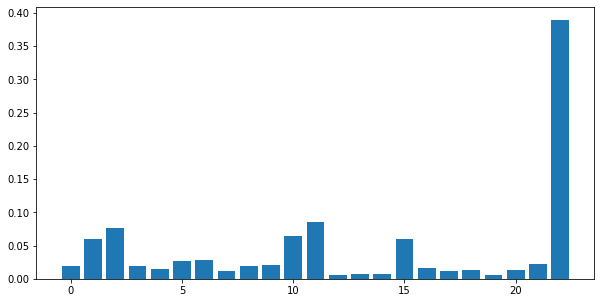

In [14]:
# feature importance
plt.figure(figsize=(10,5))
print(best_xgb_model.feature_importances_)
# plot
plt.bar(range(len(best_xgb_model.feature_importances_)), best_xgb_model.feature_importances_)
plt.show()

<Figure size 1440x1440 with 0 Axes>

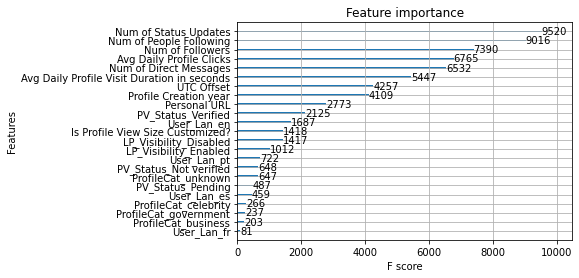

In [15]:
from xgboost import plot_importance
# plot feature importance
plt.figure(figsize=(20,20))
plot_importance(best_xgb_model)
plt.show()

#### LightGBM -Not used in this submission

In [ ]:
import lightgbm as lgb

In [ ]:
#param_grid = {
#    'num_leaves': [31, 127],
#    'reg_alpha': [0.1, 0.5],
#    'min_data_in_leaf': [30, 50, 100, 300, 400],
#    'lambda_l1': [0, 1, 1.5],
#    'lambda_l2': [0, 1]
#    }

In [ ]:
parameters_for_testing_lgb= {
    'learning_rate':[0.01,0.001],
    'feature_fraction': [0.5,0.6, 0.7],#0.6,#0.9,
    'bagging_fraction': [0.5, 0.6, 0.75,0.8],#0.7,
    'num_leaves': [128, 200],
    'reg_alpha': [1,3,5,10,15],
    'min_data_in_leaf': [30, 50, 100],
    'max_bin': [300, 400, 500, 700],
    'reg_alpha':[1,5,10,15],
     'seed':[42]
    }

In [ ]:
lgb_estimator= lgb.LGBMRegressor(boosting_type='gbdt',  objective='regression', learning_rate=0.01, metric='mse')

In [ ]:
gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=parameters_for_testing_lgb, cv=k_fold)
lgb_model = gsearch.fit(X=X_train, y=y_train)


In [ ]:
print('best params')
print (lgb_model.best_params_)
print('best score')
print (lgb_model.best_score_)

best params
{'bagging_fraction': 0.5, 'feature_fraction': 0.7, 'learning_rate': 0.01, 'max_bin': 700, 'min_data_in_leaf': 30, 'num_leaves': 128, 'reg_alpha': 1, 'seed': 42}
best score
0.42286016491256273


#####2nd try
best params
{'bagging_fraction': 0.5, 'feature_fraction': 0.7, 'learning_rate': 0.01, 'max_bin': 700, 'min_data_in_leaf': 30, 'num_leaves': 128, 'reg_alpha': 1, 'seed': 42}
best score
0.42286016491256273
# 1st try
best params
{'bagging_fraction': 0.6, 'feature_fraction': 0.6, 'learning_rate': 0.01, 'min_data_in_leaf': 50, 'num_leaves': 128, 'reg_alpha': 0.1, 'seed': 42}
best score
0.3991756418921247

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',#'dart',#'gbdt',
    'objective': 'regression',
    'metric': ['mae', 'mse'],
    'learning_rate': 0.001,#0.01,#0.005,
    'feature_fraction': 0.6,#0.5,#0.6,#0.9,-- modify 0,5
    'bagging_fraction': 0.6,#0.75,#0.7,-- modify 0.75
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 6,#6,#8,
    "num_leaves": 128,  
    "max_bin": 400,#700,#512,
    "num_iterations": 100000,
    "n_estimators": 1000,
    "seed":42,
    'min_data_in_leaf':50,#30
    'reg_alpha': 10#10#5#2
}

In [ ]:
best_gbm = lgb.LGBMRegressor(**hyper_params)

In [ ]:
best_gbm.fit(X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='l1',
        early_stopping_rounds=1000)#1000)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[4482]	valid_0's l1: 1.29366	valid_0's l2: 3.01053	valid_0's l1: 1.29366
[4483]	valid_0's l1: 1.29366	valid_0's l2: 3.01049	valid_0's l1: 1.29366
[4484]	valid_0's l1: 1.29365	valid_0's l2: 3.01045	valid_0's l1: 1.29365
[4485]	valid_0's l1: 1.29364	valid_0's l2: 3.0104	valid_0's l1: 1.29364
[4486]	valid_0's l1: 1.29363	valid_0's l2: 3.01037	valid_0's l1: 1.29363
[4487]	valid_0's l1: 1.29361	valid_0's l2: 3.01032	valid_0's l1: 1.29361
[4488]	valid_0's l1: 1.2936	valid_0's l2: 3.01028	valid_0's l1: 1.2936
[4489]	valid_0's l1: 1.29358	valid_0's l2: 3.01021	valid_0's l1: 1.29358
[4490]	valid_0's l1: 1.29357	valid_0's l2: 3.01015	valid_0's l1: 1.29357
[4491]	valid_0's l1: 1.29356	valid_0's l2: 3.01008	valid_0's l1: 1.29356
[4492]	valid_0's l1: 1.29356	valid_0's l2: 3.01004	valid_0's l1: 1.29356
[4493]	valid_0's l1: 1.29354	valid_0's l2: 3.00997	valid_0's l1: 1.29354
[4494]	valid_0's l1: 1.29354	valid_0's l2: 3.00992	valid_0's l1: 1.29354
[44

LGBMRegressor(bagging_fraction=0.6, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.001, max_bin=400,
              max_depth=6, metric=['mae', 'mse'], min_child_samples=20,
              min_child_weight=0.001, min_data_in_leaf=50, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_iterations=100000,
              num_leaves=128, objective='regression', random_state=None,
              reg_alpha=10, reg_lambda=0.0, seed=42, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [ ]:
#calculate error
y_pred = best_gbm.predict(X_val, num_iteration=best_gbm.best_iteration_)
y_pred=np.exp(y_pred)-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1

In [ ]:
print("Test accuracy",best_gbm.score(X_val, y_val))
print("Train accuracy", best_gbm.score(X_train, y_train))
print("MSLE",mean_squared_log_error(y_check, y_pred))
print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))


Regressor.append("LightGBM")
train_scores.append(best_gbm.score(X_train, y_train))
test_scores.append(best_gbm.score(X_val, y_val))

Test accuracy 0.565720790920236
Train accuracy 0.6284861125331096
MSLE 2.9420107960968975
RMSLE 1.7152290797724068


In [ ]:
from sklearn.model_selection import cross_val_score
# cross-validation
scores = cross_val_score(best_gbm, df_train[cols_x], df_train[cols_y], cv=k_fold,scoring=my_scorer)
print("Reg: Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n

Reg: Accuracy: 1.8042 (+/- 0.0227)


##Results

In [ ]:
# we shouldnt pick based on the cv?
for i,text in enumerate(Regressor):
    result.loc[i+1] = [text,np.around(train_scores[i]*100, decimals = 1),np.around(test_scores[i]*100, decimals=1)]
result

,Regressors,Training,Testing
1,SVR,59.9,56.0
2,KNN,100.0,48.6
3,Linear Regression,48.6,49.5
4,Linear Regression,48.6,49.5
5,XGboost,59.4,55.9
6,LightGBM,62.8,56.6


###Ensemble with voting regressor

##### Ensemble1

In [ ]:
##### Trying to improve with the ensemble of all predictors
from sklearn.ensemble import VotingRegressor

Reg_vote1 = VotingRegressor(
    estimators=[
        ('knn', knn), # KNN
        ('svm', regressor), # SVM
        ('lr', regressor), # Linear regressor
          ])
Reg_vote1.fit(X_train, y_train)


VotingRegressor(estimators=[('knn',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=20,
                                                 p=2, weights='distance')),
                            ('svm',
                             SVR(C=2, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma=0.1, kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False)),
                            ('lr',
                             SVR(C=2, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma=0.1, kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                

######Crossvalidation of error

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Reg_vote1, df_train[cols_x], df_train[cols_y], cv=k_fold,scoring=my_scorer)
print("Reg: RSMLE: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Reg: RSMLE: 1.7612 (+/- 0.0181)


##### Ensemble2

In [ ]:

Reg_vote2 = VotingRegressor(
    estimators=[
        ('knn', knn), # KNN
        ('svm', regressor), # SVM
        ('lr', regressor), 
        ('best_xgb_model', best_xgb_model), #  XGB_model# Linear regressor
          ])
Reg_vote2.fit(X_train, y_train)

[23:21:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('knn',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=20,
                                                 p=2, weights='distance')),
                            ('svm',
                             SVR(C=2, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma=0.1, kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False)),
                            ('lr',
                             SVR(C=2, cache_size=200, coef0=0.0...
                                          colsample_bytree=0.4,
                                          early_stopping_rounds=5, gamma=1,
                                          im

######Crossvalidation of error

In [ ]:
scores = cross_val_score(Reg_vote2, df_train[cols_x], df_train[cols_y], cv=k_fold,scoring=my_scorer)
print("Reg: RSMLE: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

[23:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:23:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:25:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:25:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Reg: RSMLE: 1.7414 (+/- 0.0190)


##### Ensemble3

In [ ]:
##### Trying to improve with the ensemble of all predictors
from sklearn.ensemble import VotingRegressor

Reg_vote = VotingRegressor(
    estimators=[
        ('svm', regressor), # SVM
        ('best_xgb_model', best_xgb_model), #  XGB_model
        ])
Reg_vote.fit(X_train, y_train)

[23:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('svm',
                             SVR(C=2, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma=0.1, kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False)),
                            ('best_xgb_model',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.4,
                                          early_stopping_rounds=5, gamma=1,
                                          importance_type='gain',
                                          learning_rate=0.001, max_delta_step=0,
                                          max_depth=3, min_child_weight=1.5,
                                          missing=None, n_estimators=10000,
       

######Crossvalidation of error

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Reg_vote, df_train[cols_x], df_train[cols_y], cv=k_fold,scoring=my_scorer)
print("Reg: Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))


[23:27:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:29:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Reg: Accuracy: 1.7248 (+/- 0.0225)


In [ ]:
Reg_vote.fit(df_train[cols_x], df_train[cols_y])
y_pred=np.exp(Reg_vote.predict(X_val))-1
y_pred = [0 if x<0 else x for x in y_pred]
y_check=np.exp(y_val)-1
print("RMSLE",np.sqrt(mean_squared_log_error(y_check, y_pred)))

[23:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE 1.5976244133877509


#Fitting Ensemble 3 Since CV score is Maximum

In [ ]:
Reg_vote.fit(df_train[cols_x], df_train[cols_y])
y_test_pred=np.exp(Reg_vote.predict(df_test[cols_x]))-1
y_test_pred = [0 if x<0 else x for x in y_test_pred]

[23:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#**Submission File**

In [ ]:

dummy = pd.DataFrame()
dummy["Id"] = df_test["Id"]
dummy["Predicted"]=np.array(y_test_pred,dtype=int)
dummy.to_csv("Best_Submission.csv", sep=',' ,index=False)



#Sensitivity analysis of k and Crossvalidation for Ensemble 3 model

In [ ]:
# record mean and min/max of each set of results
def evaluate_model(cv):
    scores = cross_val_score(Reg_vote, df_train[cols_x], df_train[cols_y], cv=cv,scoring=my_scorer)
    return mean(scores), scores.min(), scores.max()    

# calculate the ideal test condition
#ideal, _, _ = evaluate_model(LeaveOneOut())
#print('Ideal: %.3f' % ideal)

folds = [2,3,4,5,6,7,8,9,10]
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv)
	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)


[00:00:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:01:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
> folds=2, accuracy=1.740 (1.736,1.743)
[00:01:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
> folds=3, accuracy=1.732 (1.714,1.750)
[00:03:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:04:07] WARNING: /workspace/

In [ ]:
folds = [12,14,16,18,20]

for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv)
	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)

[00:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:38:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:39:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:40:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:40:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:41:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

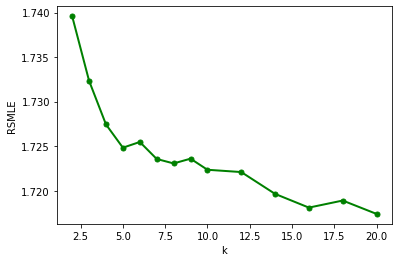

In [ ]:
# line plot of k mean values with mean error
folds = [2,3,4,5,6,7,8,9,10,12,14,16,18,20]
plt.plot(folds, means,'go-', linewidth=2, markersize=5)
plt.xlabel("k")
plt.ylabel("RSMLE")
plt.show()

#Bootstrap

In [ ]:
from sklearn.utils import resample
num_iterations = 400
error=[]
score=[]

# Bootstrapping loop
for i in range(0, num_iterations):

    X_samples, y_samples = resample(X_train,  y_train, random_state=i,)
    
    Reg_vote.fit(X_samples, y_samples)
    y_pred=np.exp(Reg_vote.predict(X_val))-1
    y_pred = [0 if x<0 else x for x in y_pred]
    y_check=np.exp(y_val)-1
    error.append(np.sqrt(mean_squared_log_error(y_check, y_pred)))
    score.append(Reg_vote.score(X_val, y_val))
    print(i)

confidence_percentage = 95

CI_Lower_error=np.percentile(error,2.5)
CI_Upper_error=np.percentile(error,97.5)



[13:58:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0
[13:59:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1
[14:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2
[14:00:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3
[14:01:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
4
[14:01:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5
[14:02:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
6
[14:02:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated 

In [ ]:
confidence_percentage = 95

CI_Lower_error=np.percentile(error,2.5)
CI_Upper_error=np.percentile(error,97.5)

print('{:d}% Confidence Interval of Error = [{:.2f},{:.2f}]'.format(int(confidence_percentage), CI_Lower_error, CI_Upper_error))


95% Confidence Interval of Error = [1.71,1.74]


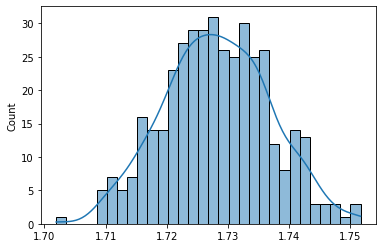

In [ ]:
sns.histplot(error,kde=True,bins=30)

# Methods comparision

In [ ]:
# prepare models
#inspired from: https://towardsdatascience.com/a-simple-way-to-pick-the-right-model-d362272b453d
models = []
models.append(('Linear Regression', lregressor))
models.append(('KNN', knn))
models.append(('SVR', regressor))
models.append(('XGB',best_xgb_model))
models.append(('LR+KNN+SVR',Reg_vote1))
models.append(('KNN+SVR+XGB',Reg_vote2))
models.append(('SVR+XGB',Reg_vote))

In [ ]:
from sklearn import model_selection
# evaluate each model in turn
results = []
names = []

for name, model in models:
  kfold = model_selection.KFold(n_splits=5, shuffle=True,random_state=1)
  cv_results = model_selection.cross_val_score(model, df_train[cols_x], df_train[cols_y], cv=kfold, scoring=my_scorer)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %0.4f (%0.4f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Linear Regression: 1.8402 (0.0276)
KNN: 1.8640 (0.0156)
SVR: 1.7533 (0.0219)
[23:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB: 1.7307 (0.0210)
LR+KNN+SVR: 1.7612 (0.0181)
[23:42:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg

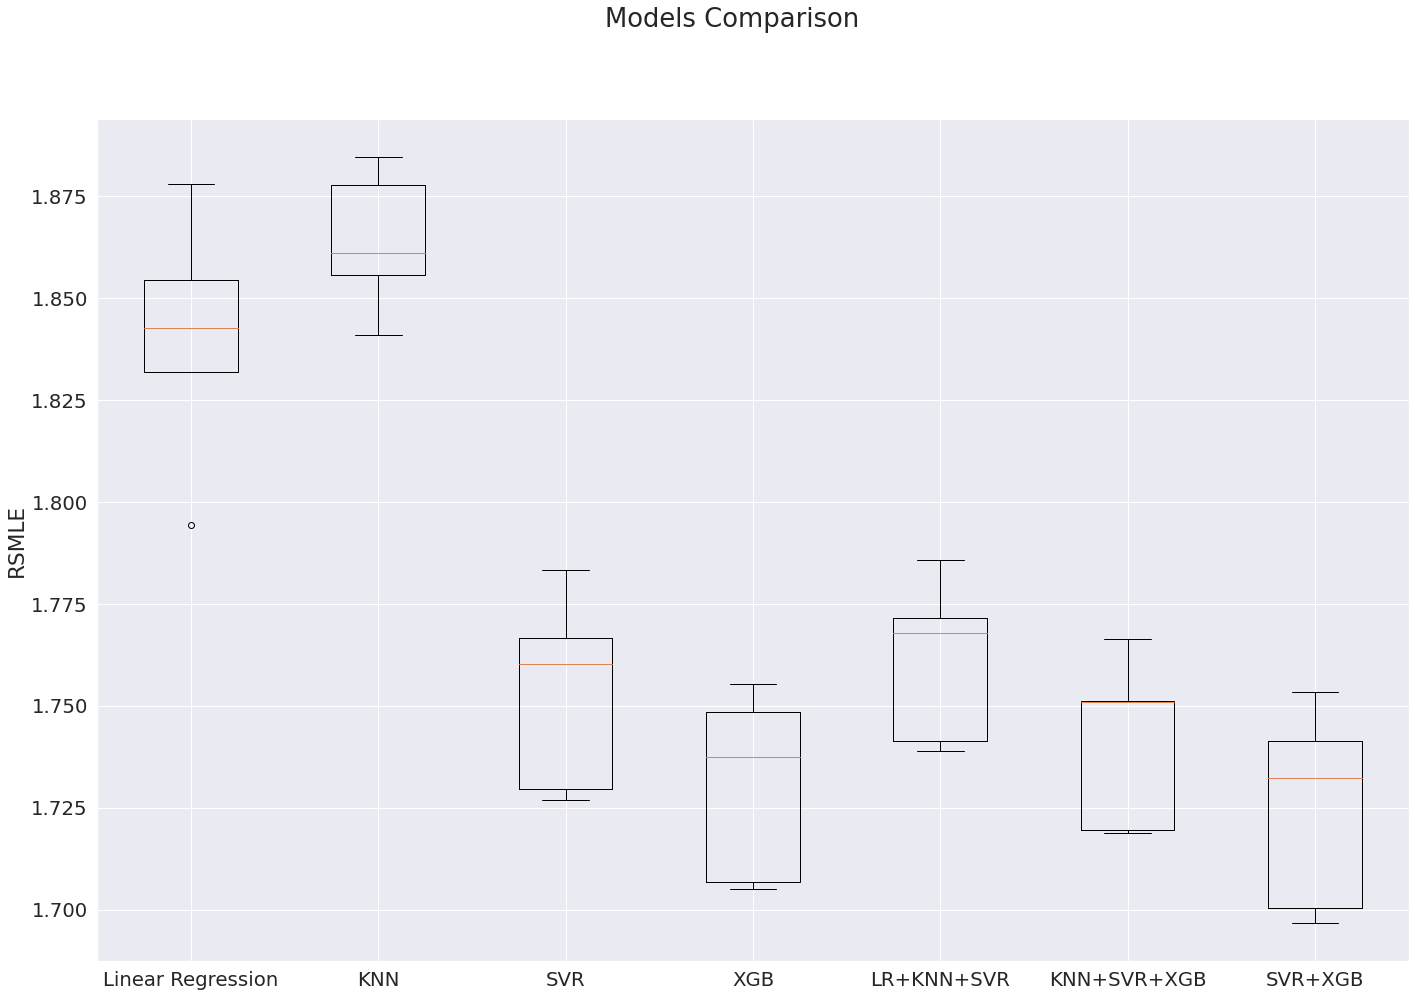

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Models Comparison')
plt.rcParams.update({'font.size': 12})
fig.set_size_inches(23.5, 15.5, forward=True)
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('RSMLE')

ax.set_xticklabels(names)
plt.show()

# Preprocessing of Images 

Some basic study of images but havent included in this submission

In [ ]:
#create folder
!mkdir /content/ift6758-a20


unzip:  cannot find or open /content/ift6758-a20.zip, /content/ift6758-a20.zip.zip or /content/ift6758-a20.zip.ZIP.


In [ ]:
!unzip /content/ift6758-a20.zip

In [ ]:
!cp -r /content/test_profile_images /content/ift6758-a20
!cp -r /content/train_profile_images /content/ift6758-a20
!cp -r /content/test.csv /content/ift6758-a20
!cp -r /content/train.csv /content/ift6758-a20

In [ ]:
!ls /content/ift6758-a20

ift6758-a20.zip  test.csv  test_profile_images	train.csv  train_profile_images


In [ ]:
df_train = pd.read_csv("/content/ift6758-a20/train.csv")
df_test = pd.read_csv("/content/ift6758-a20/test.csv") 

In [ ]:
import glob
import cv2

c= df_train['Profile Image']
t=df_test['Profile Image']

def read_img(img_list, img):
    n = cv2.imread(img, 0)
    img_list.append(n)
    return img_list

pathtr = glob.glob("/content/ift6758-a20/train_profile_images/profile_images_train/*.png") #or jpg
pathte = glob.glob("/content/ift6758-a20/test_profile_images/profile_images_test/*.png") #or jpg
list_ = []#train set
list_t = []# test set

# for training set
for j in range(0,len(c)):
   cv_image = [read_img(list_, c[j])]

#for test set
for l in range(0,len(t)):
   cv_image_t = [read_img(list_t, t[l])]


In [ ]:
from keras.preprocessing.image import load_img
from skimage.feature import hog

fd=[]
fdtest=[]
# training set
for i in range(0,len(pathtr)):
   img = load_img(pathtr[i])
   fd.append(hog(img, orientations=9, pixels_per_cell=(10, 10), 
                    cells_per_block=(2, 2), multichannel=True))
# for test set
for m in range(0,len(pathte)):
   img = load_img(pathte[m])
   fdtest.append(hog(img, orientations=9, pixels_per_cell=(10, 10), 
                    cells_per_block=(2, 2), multichannel=True))  

In [ ]:
from sklearn.decomposition import PCA

for n in np.arange(25):
  pca = PCA(n_components=n).fit(fd)
  exp_vars = pca.explained_variance_ratio_
  total_exp_var = exp_vars.sum()

  if total_exp_var >= 0.85:
    break

print('Number of components required for 85% explained variance = ',n)

Number of components required for 85% explained variance =  24


In [ ]:
pca = PCA(n_components=24)
pca.fit(fd)
print('Component-wise Variance explained = ',pca.explained_variance_ratio_)
print('         Total Variance explained = ',pca.explained_variance_ratio_.sum())

Component-wise Variance explained =  [0.14274545 0.09578483 0.06263867 0.04995256 0.04363701 0.03869775
 0.03453125 0.03200941 0.03091683 0.02520112 0.02448235 0.0229993
 0.02240815 0.02013821 0.01939924 0.0185488  0.01768652 0.01635751
 0.01526787 0.01439438 0.01321084 0.01301294 0.01248605 0.01208347]
         Total Variance explained =  0.79859052290186


In [ ]:
X_r = pca.transform(fd)
X_r_t = pca.transform(fdtest)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(X_r)
cluster_labels = kmeans.labels_
print(cluster_labels)

[1 0 1 ... 0 0 2]


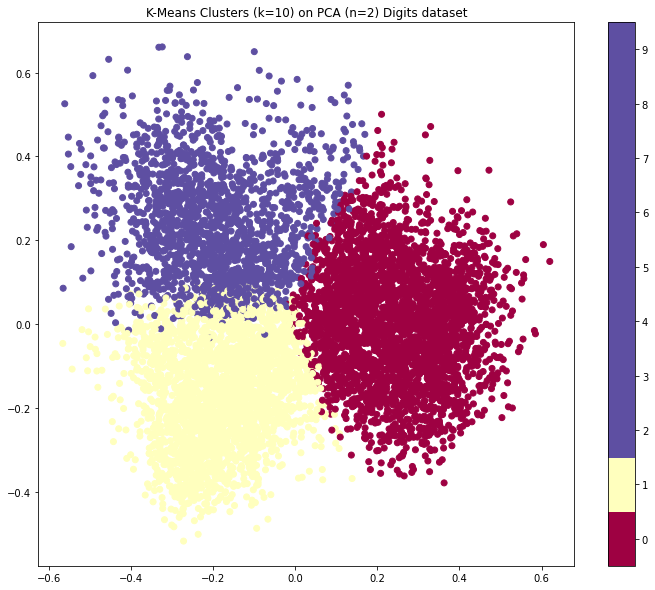

In [ ]:
plt.figure(figsize=(12, 10))  

plt.scatter(X_r[:,0], X_r[:,1], c=cluster_labels, cmap='Spectral')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('K-Means Clusters (k=10) on PCA (n=2) Digits dataset')

plt.plot();

In [ ]:
Imageclusters = kmeans.labels_
df = pd.DataFrame(Imageclusters,columns=['Clusters'])


In [ ]:
dft = pd.DataFrame(kmeans.predict(X_r_t),columns=['Clusters'])


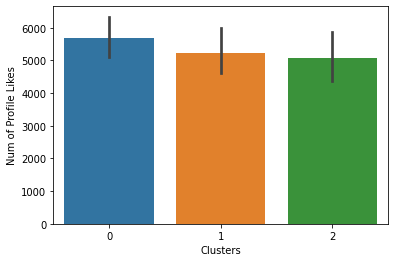

In [ ]:
# Relation of Profile Category with Num of Profile Likes
sns.barplot(x=df['Clusters'], y=df_cleaned['Num of Profile Likes']);